# Titanic Case

# Problem statement

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we will predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Importing required Libaries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset includes multiple information of 891 passengers like name,sex,age,sibsp,ticket and fare etc.

# EDA of Dataset

In [3]:
ds=pd.DataFrame(data=data)
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Shape of Dataset

In [4]:
ds.shape

(891, 12)

In [5]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

So our dataset datatypes is of int64,float64 & object type

# Basic Info of Dataset

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have missing values in age and cabin variable and dataset consumes memory of 84+kb

# Attributes information

In [7]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Statistical Description

NUMERICAL DATA TYPE DESCRIPTION

In [8]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As our data set is having categorial variables in nature.
Avg age of passengers are 30 years
Max Fare is 51.32
Most of passengers belong to class-2


# Object Data type description

In [9]:
ds.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bing, Mr. Lee",male,347082,G6,S
freq,1,577,7,4,644


From object description of data we can observe that in Name all values are unique and sex variable having 2 unique category.
ticket , cabin and embarked unique values description with top values description.

In sex no.of males are more in comparision to females

# Checking the null values in data set

In [10]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

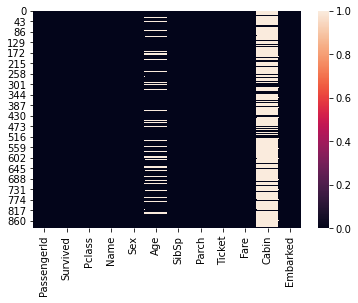

In [11]:
sns.heatmap(ds.isnull())

There are 177 missing values in age,687 in cabin and 2 values in Embarked varaible

# Survived info

In [12]:
ds['Survived'].unique()
ds['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Only 38% of passengers have been survived while majority of 61% have not been survived from Titanic disaster

# Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64

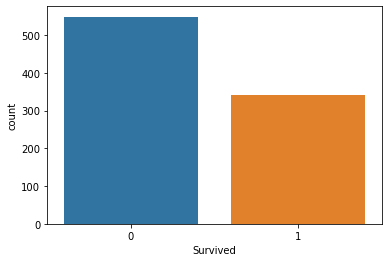

In [13]:
sns.countplot(x='Survived',data=ds)
ds['Survived'].value_counts()

549 passengers have not been survived out of provided 891 passengers list and 342 has been survived.

<AxesSubplot:xlabel='Age', ylabel='Density'>

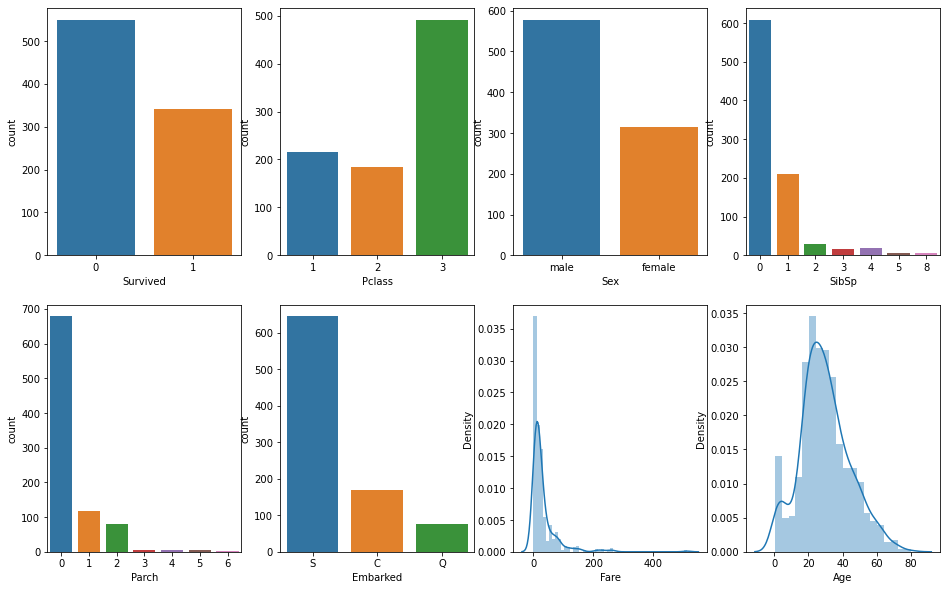

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=ds,ax=axes[0,0])
sns.countplot('Pclass',data=ds,ax=axes[0,1])
sns.countplot('Sex',data=ds,ax=axes[0,2])
sns.countplot('SibSp',data=ds,ax=axes[0,3])
sns.countplot('Parch',data=ds,ax=axes[1,0])
sns.countplot('Embarked',data=ds,ax=axes[1,1])
sns.distplot(ds['Fare'], kde=True,ax=axes[1,2])
sns.distplot(ds['Age'].dropna(),kde=True,ax=axes[1,3])

From above graphs we have visualize following details for each of variable :
    
1.Survived :
    0-Not survived around 500+ passengers
    1-Survived passengers were around 300+
    
2.Pclass:
Passenger class is categorized in 3 types that is 1st,2nd and 3rd while 3rd class refers to lower, from above graph we can see that there are large numbers of passengers belong to lower class
in comparision to 1st and 2nd

3.Sex:
    Males passengers have been boarded around 550+ which is approx 65% of passengers.
    While no. of females are 300+ consist of 35% of passengers list.
    
4.Sibsb:
    No.of sibilngs and spouse aboarded are very less ,max no.(600)of passengers dont boarded with siblings or spouse.
    Around 200 passengers have been boarded the titanic with their siblings of spouse
    
5.Parch:
    No.of parents or children aboarded along with passengers were very less , majority of (650+)have been not been boarded with their parents or children.
    100 of passengers have take their parents or children

6.Embarked:Port of Embarkation
    (C = Cherbourg; Q = Queenstown; S = Southampton),majority of passengers(620+) has been boarded from Southampton then from cherbourg and queentown.

7.Fare:
     Fare is starting from 0 to 500+ for different type class of passengers.
        0 currency fare might be for ship captain, ship sailors or for ship workers

8.Age :
    Majority of passengers belong to age group of 25+ to 50 years

# Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

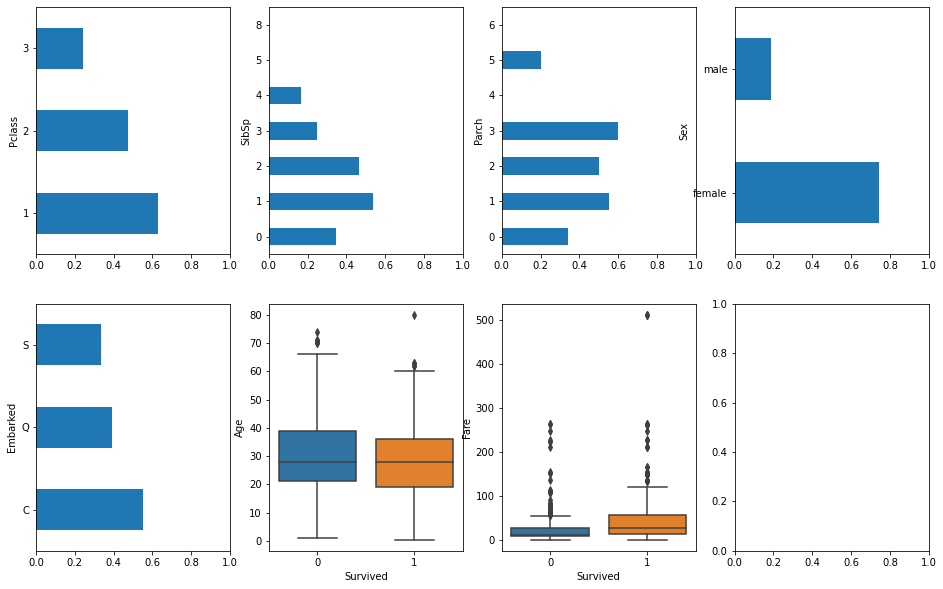

In [15]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
ds.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
ds.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
ds.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
ds.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
ds.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=ds,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=ds,ax=axesbi[1,2])

# From above graph representation we have observed below details for each of variable:

1.Pclass:

Majority of (60%)1st class passengers has survival rate while 3rd class passengers has worst survival rate.

2.Sibsp:

Passengers with single or no sibilings has more surviavl rate.

3.78% of females passenger has been survied while males were only 20% , sex and survival rate has strong relationship

4.Passengers embarked from cherbourg port nearly have 60% of survival rate in compare to queentown and southmpton

5.Age group between 20 to 38 years passengers has more survival rate along with senior passenger having age above 70years

6.Passengers who have paid for ticket currency more than 50 or 100 have good rate of survival as there is marginal relationship between fare and survival rate.


<AxesSubplot:xlabel='Age', ylabel='Sex'>

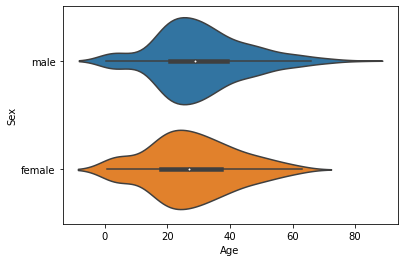

In [16]:
sns.violinplot(x='Age',y='Sex',data=ds)

In Age group more concentration of females were between 20-45 years while males are of age 20-60 years

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

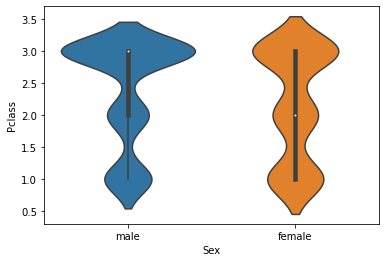

In [17]:
sns.violinplot(x='Sex',y='Pclass',data=ds)

Majority of females belongs to 1st class while male passengers are from 3rd class who have boared the titanic

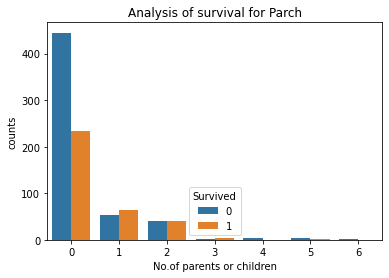

In [18]:
sns.countplot(x='Parch',data=ds,hue='Survived')
plt.xlabel('No.of parents or children')
plt.ylabel('counts')
plt.title('Analysis of survival for Parch')
plt.show()

Passengers along with parents or children have poor survival rate.

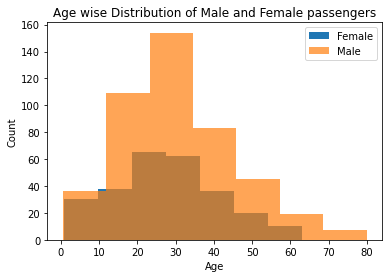

In [19]:
plt.hist(ds['Age'][(ds['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(ds['Age'][(ds['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

There are many males passengers have been aboarded compared to female passengers

# Multi-Variate Analysis

<AxesSubplot:>

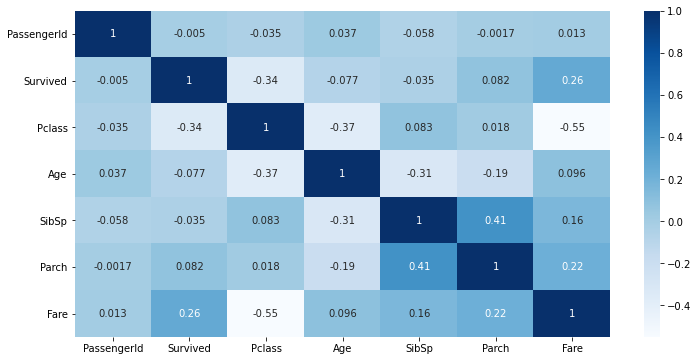

In [20]:
fig=plt.figure(figsize=(12,6))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

From above correlation map we can see that Pclass is inversely related to survial rate,while fare and age is slightly co-related

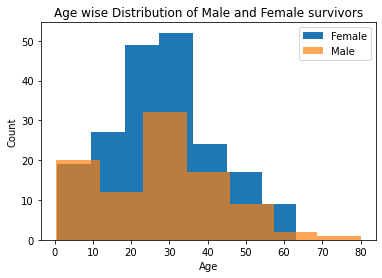

In [21]:
plt.hist(ds['Age'][(ds['Sex'] == 'female') & (ds['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(ds['Age'][(ds['Sex'] == 'male') & (ds['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

In comparision to Male passengers female passengers survival rate is high who were in their ages of 15-45 years.
Male passengers survival age lies between 5-55 years

# Now will see how class and gender related based on survival

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

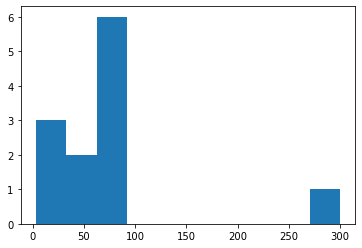

In [22]:
plt.hist(ds.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = ds.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Out of 891 passengers boarded 216 passengers were from first class consists of 94 females and 122 males passengers from which 91 females and 45 males has been survived
In other classes we can see females passengers survival rate is higher than males passenger aboarded.

Will see survival rate across all the classes.

In [23]:
ds.groupby(['Pclass'])['Survived'].sum()/ds.groupby(['Pclass'])['Survived'].count()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

survival rate is high in 1st class i.e 62% .It can be seen that class plays role in survival of the passengers

# Survival Segregation based on Class and Gender

Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

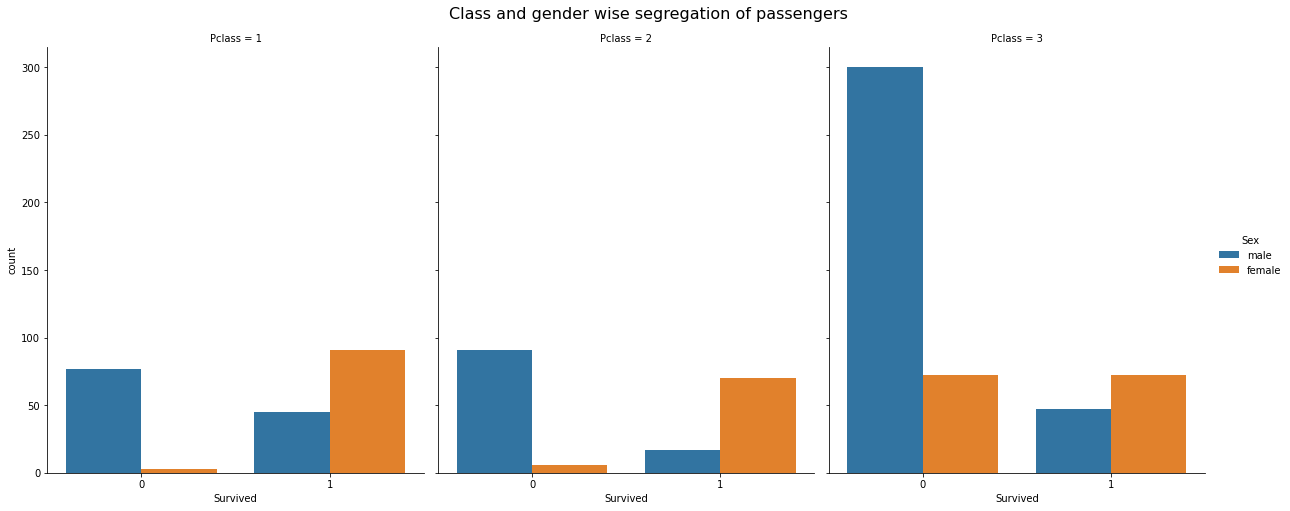

In [24]:
sns.factorplot('Survived', col='Pclass', hue='Sex', data=ds, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

In all classes it has been observed that females passengers have good survival rate in comparision to males.

Gender also plays role in survival of passengers

# Segregation of Survival rate basis the Embark and Class of Passengers

Text(0.5, 0.98, 'Embarked port and Class wise segregation of passengers')

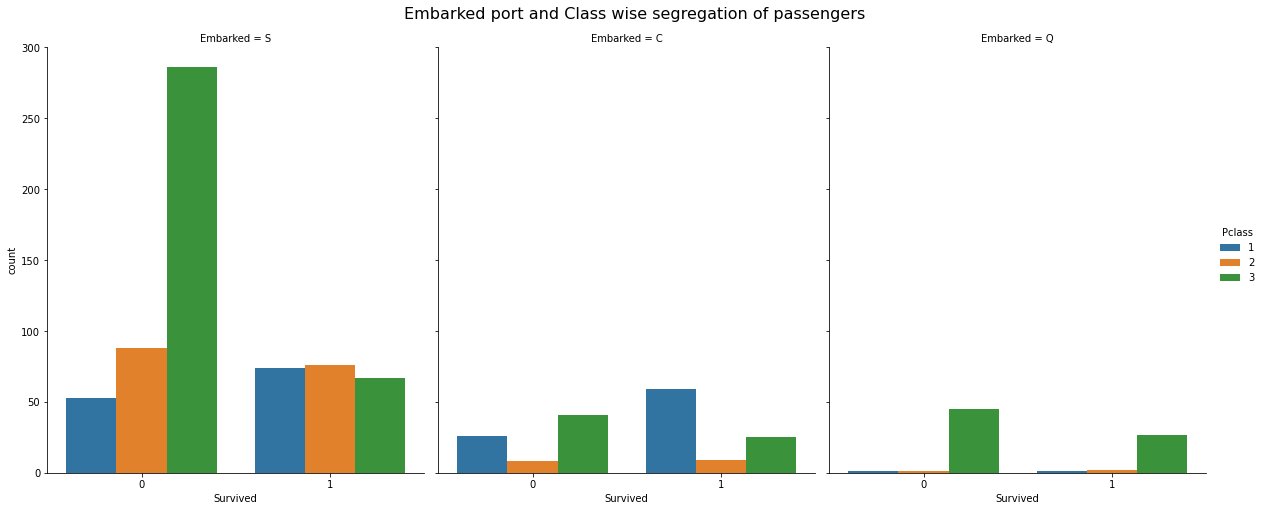

In [25]:
sns.factorplot('Survived', col='Embarked', hue='Pclass', data=ds, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Embarked port and Class wise segregation of passengers', fontsize=16)

Embark point :
    
1.Southmpton-Different classes of passengers boarded from Southmpton point, 3rd class of passengers have worst survival rate and survial rate  between 3 of them is 
equal.
2.From Cherbourgh port 1st class passengers have good rate of survival in comparing to other classes.
3.Queentown embarktion point mostly 3rd class passengers have been boarded and survival rate is less.

We can observed that most of passengers have been boarded from Southmpton point

# Segregating the passengers according to their Embarkation point for comparing their Agev/s fare for all classes

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

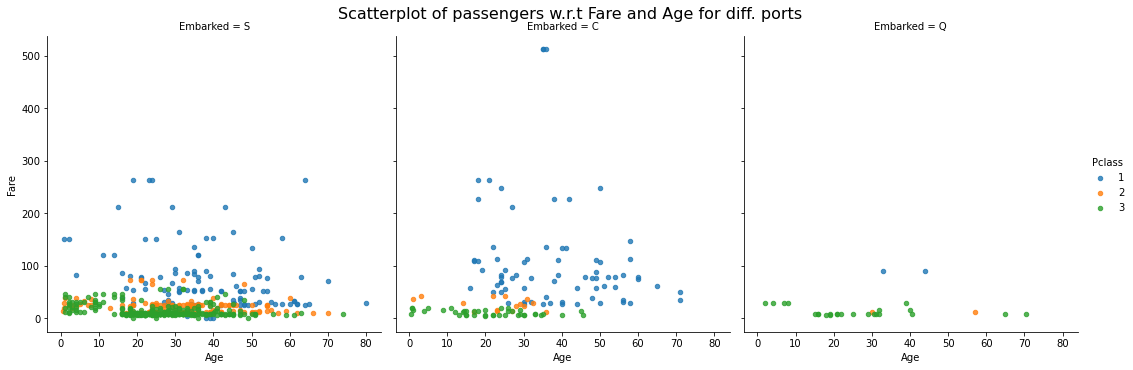

In [26]:
sns.lmplot('Age', 'Fare', data=ds, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

Class 2 and 3 mostly have same fare across all ages while Class 1st fare is varies across all ages.

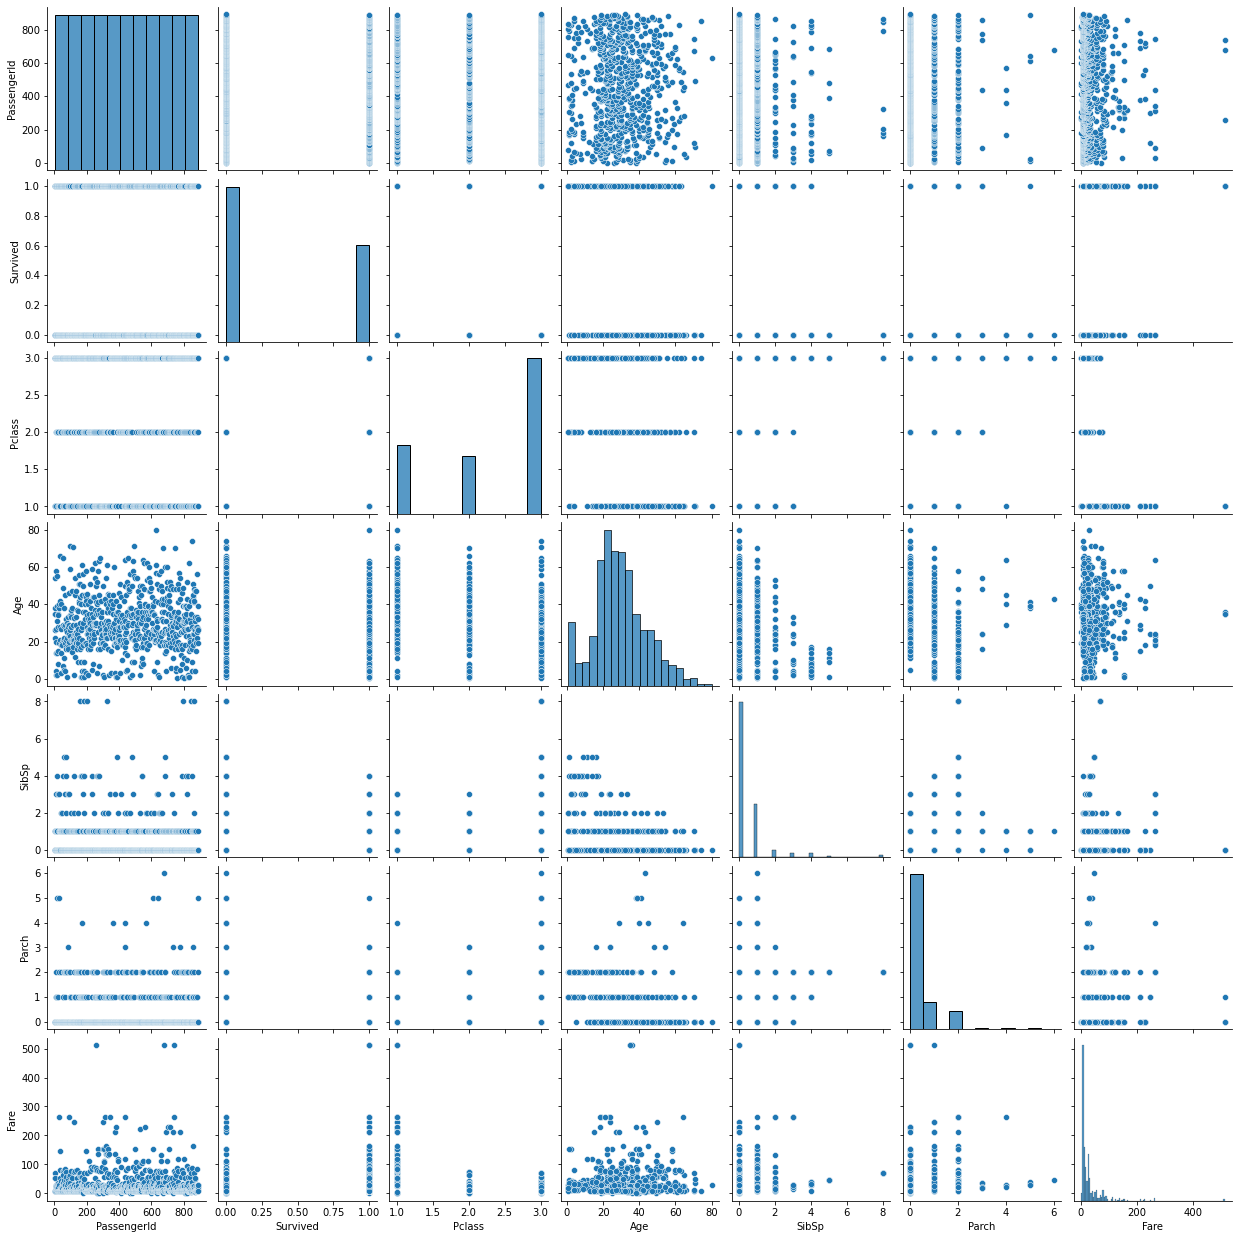

In [27]:
sns.pairplot(ds)

In [28]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Pre-processing and manipulation

Filling the missing values in Age,Cabin and Embarked variables

In [29]:
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
ds['Age']=imp.fit_transform(ds['Age'].values.reshape(-1,1))

Dropping the Passenger id,Name ,ticket and cabin variables as they wil not affect the target variable

In [30]:
ds.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [31]:
impt=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
ds['Embarked']=impt.fit_transform(ds['Embarked'].values.reshape(-1,1))

Labeling the Categorial variables into numerical values through label Encoding

In [32]:
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [33]:
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now we can see missing values in age,Cabin and Embarked variable has been updated through simple Imputer strategy 

# Preparation of data for Model training and testing 

Feature variable x is ready with shape of 891 rows and 7 columns

In [34]:
x=ds.iloc[:,1:12]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


Target variable y (Survived)

In [35]:
y=ds.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
y.shape

(891,)

# Scaling of Feature data(x) for model fitting

In [37]:
scale=StandardScaler()
x=scale.fit_transform(x)

# Training and Testing split model

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 7)
(268, 7)
(623,)
(268,)


30% of data will be tested basis 70% of data been trained at random state=45

# Classification Methods

Logistic Regression

In [39]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8246268656716418
[[151  27]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.72      0.78      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268



Through Logistic regression model we are getting testing accuracy of 82% ,still model is hhaving false postive & negative values.

Gaussian Naive Bayes

In [40]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8097014925373134
[[147  31]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       178
           1       0.69      0.78      0.73        90

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.82      0.81      0.81       268



we can observed testing accuracy of 81% from Gaussian NB model and Avg f1 score is 79%

SVC

In [73]:
from sklearn.svm import SVC

kernellist=['linear','rbf','poly']
for i in kernellist:
    sv=SVC(kernel=i,probability=True)
    sv.fit(x_train,y_train)
    pred_y=sv.predict(x_test)
    print('Accuracy of ',i,'is:')
    print(accuracy_score(y_test,pred_y))
    print(confusion_matrix(y_test,pred_y))
    print(classification_report(y_test,pred_y))

Accuracy of  linear is:
0.8246268656716418
[[153  25]
 [ 22  68]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       178
           1       0.73      0.76      0.74        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268

Accuracy of  rbf is:
0.8470149253731343
[[159  19]
 [ 22  68]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       178
           1       0.78      0.76      0.77        90

    accuracy                           0.85       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268

Accuracy of  poly is:
0.8432835820895522
[[156  22]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       178
           1       0.76      0.78      0.77 

Support Vector Classifier's rbf model provides best testing accuracy of 85% as well as mean F1 score is 83%

KNeighbors Classifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8283582089552238
[[153  25]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



Kneighbors classifier at 7 neighbors gives 83% of testing accuracy

Decision Tree Classifier

In [43]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7835820895522388
[[141  37]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       178
           1       0.65      0.77      0.70        90

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.80      0.78      0.79       268



Before hypertuning of decision tree classifier model we are getting accuracy of 77%

# Enesmble Methods

In [44]:
rtf=RandomForestClassifier()
rtf.fit(x_train,y_train)
predrf=rtf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.835820895522388
[[153  25]
 [ 19  71]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       178
           1       0.74      0.79      0.76        90

    accuracy                           0.84       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [45]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preda=ada.predict(x_test)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

0.8097014925373134
[[146  32]
 [ 19  71]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       178
           1       0.69      0.79      0.74        90

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.82      0.81      0.81       268



In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predg=gbc.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.8470149253731343
[[154  24]
 [ 17  73]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       178
           1       0.75      0.81      0.78        90

    accuracy                           0.85       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.85      0.85      0.85       268



From above 3 of ensemble methods we are getting highest accuracy of 85% from Gradient boosting classifier before hypertuning of parameters

# Cross-Validating score of the Models

In [47]:
for j in range(2,11):
    lgscores=cross_val_score(lg,x,y,cv=j)
    mean=lgscores.mean()
    std=lgscores.std()
    print(f"At cross fold{j} the cv score {mean} and std is {std}")
    print("\n")

At cross fold2 the cv score 0.7867587040862599 and std is 0.0020053408575603227


At cross fold3 the cv score 0.7912457912457912 and std is 0.004761661826172068


At cross fold4 the cv score 0.7923989011432957 and std is 0.02036808822597699


At cross fold5 the cv score 0.7845207457158998 and std is 0.016764719881414474


At cross fold6 the cv score 0.7923695507588125 and std is 0.021751764449869527


At cross fold7 the cv score 0.7946252812148481 and std is 0.02448723869625792


At cross fold8 the cv score 0.7946126930501931 and std is 0.023136781063325163


At cross fold9 the cv score 0.7934904601571268 and std is 0.028215050707018033


At cross fold10 the cv score 0.7957428214731586 and std is 0.019233622841571808




At k fold of 10 the avg accuracy is approx 80%

In [48]:
gnbscores=cross_val_score(gnb,x,y,cv=10)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.75555556 0.75280899 0.78651685 0.79775281 0.79775281 0.7752809
 0.79775281 0.80898876 0.76404494 0.83146067]
0.7867915106117354 0.023725461043325544


In [49]:
svscores=cross_val_score(sv,x,y,cv=10)
print(svscores)
print(svscores.mean(),svscores.std())

[0.8        0.82022472 0.76404494 0.85393258 0.84269663 0.78651685
 0.80898876 0.76404494 0.85393258 0.84269663]
0.8137078651685392 0.03292652488350274


In [50]:
knnscores=cross_val_score(knn,x,y,cv=10)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.8        0.80898876 0.76404494 0.80898876 0.83146067 0.83146067
 0.87640449 0.76404494 0.82022472 0.79775281]
0.8103370786516855 0.031479929901730284


In [51]:
dtrscores=cross_val_score(dtr,x,y,cv=10)
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[0.75555556 0.79775281 0.71910112 0.76404494 0.83146067 0.75280899
 0.80898876 0.71910112 0.83146067 0.82022472]
0.7800499375780274 0.04132639325543847


In [52]:
rtfscores=cross_val_score(rtf,x,y,cv=10)
print(rtfscores)
print(rtfscores.mean(),rtfscores.std())

[0.75555556 0.83146067 0.75280899 0.85393258 0.88764045 0.83146067
 0.83146067 0.75280899 0.84269663 0.83146067]
0.8171285892634208 0.04457249854677856


In [53]:
adascores=cross_val_score(ada,x,y,cv=10)
print(adascores)
print(adascores.mean(),adascores.std())

[0.76666667 0.7752809  0.78651685 0.83146067 0.84269663 0.79775281
 0.80898876 0.80898876 0.83146067 0.82022472]
0.8070037453183521 0.02406584901022797


In [54]:
gbcscores=cross_val_score(gbc,x,y,cv=10)
print(gbcscores)
print(gbcscores.mean(),gbcscores.std())

[0.78888889 0.82022472 0.75280899 0.86516854 0.86516854 0.84269663
 0.83146067 0.79775281 0.86516854 0.83146067]
0.8260799001248438 0.03536423517225687


After under and over fitting the samples we are getting accuracy of 83% from Gradient boosting classifier model

# Hypertuning of Parameters 

In [55]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy'],'max_depth':[9,10,11],'min_samples_leaf':[2,3,5],'splitter':['random','best'],'max_features':['auto','log','sqrt']}
gd_sr=GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='accuracy',cv=10)

gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'random'}
0.8147940074906368


After hypertuning the best parameters of Decision Tree model we got accurate parameters which will be executed for testing the accuracy

In [56]:
dtr=DecisionTreeClassifier(criterion='entropy',max_depth=9,max_features='auto',min_samples_leaf=3,splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8582089552238806
[[160  18]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       178
           1       0.80      0.78      0.79        90

    accuracy                           0.86       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268



83% testing accuracy we are getting after hypertuning the parameters of Decision tree with f1-score of 0.8

In [57]:
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [58]:
sv=SVC(kernel='rbf',C=1)
sv.fit(x,y)
preds=sv.predict(x_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

0.8582089552238806
[[161  17]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       178
           1       0.80      0.77      0.78        90

    accuracy                           0.86       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268



Support Vector Classifier model accuracy is 86% after hypertuning of parameters with avg f1 score of 0.84

In [59]:
grid_param={'criterion':['gini','entropy'],'max_depth':[9,10,11],'min_samples_leaf':[2,3,5],'n_estimators':[100,150,200],'max_features':['auto','log','sqrt']}
gd_sr=GridSearchCV(estimator=rtf,param_grid=grid_param,scoring='accuracy',cv=10)

gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
0.8373408239700375


In [69]:
rtf=RandomForestClassifier(criterion='entropy',max_depth=11,max_features='sqrt',min_samples_leaf=5,n_estimators=200)
rtf.fit(x_train,y_train)
predrf=rtf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8656716417910447
[[162  16]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       178
           1       0.81      0.78      0.80        90

    accuracy                           0.87       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.86      0.87      0.86       268



Random forest classifier models fits with testing accuracy of 87% and f1 score also above 0.80

In [61]:
grid_parameters={'n_estimators':[100,150,200],'learning_rate':[.1,.01,.001],'random_state':[0,1],'max_features':['auto','sqrt','log2'],'criterion':['friedman_mse','mae','mse']}
grd=GridSearchCV(estimator=gbc,param_grid=grid_parameters,scoring='accuracy',n_jobs=1,cv=3)
grd.fit(x_train,y_train)
best_param=grd.best_params_
print(best_param)
best_result=grd.best_score_
print(best_result)

{'criterion': 'mae', 'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}
0.8025439737396259


In [62]:
gbc=GradientBoostingClassifier(criterion='mae',learning_rate=0.1,max_features='sqrt',n_estimators=200,random_state=0)
gbc.fit(x_train,y_train)
predg=gbc.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.8432835820895522
[[153  25]
 [ 17  73]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       178
           1       0.74      0.81      0.78        90

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.85      0.84      0.84       268



Atfer hypertuning of Gradient boosting model accuracy is 84%

We have observed best testing accuracy of 87% from Random Forest Classifier model after hypertuning the parameters

# ROC_AUC score & Curve

Logistic Regression

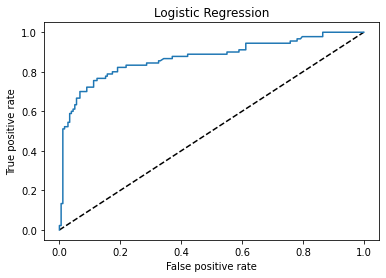

0.8130461922596753


In [70]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

Gaussian NB

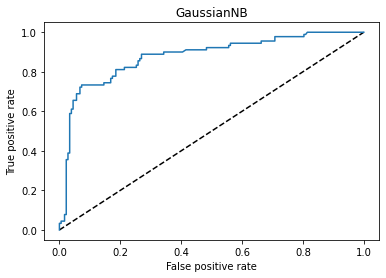

0.8018102372034956


In [71]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

SVC

0.8270911360799001


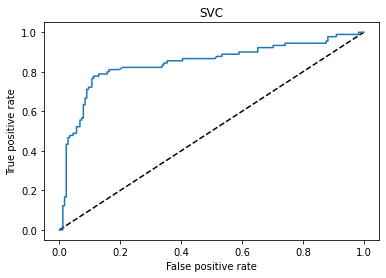

In [74]:
y_pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
auc_score=roc_auc_score(y_test,sv.predict(x_test))
print(auc_score)

Decision Tree Classifier

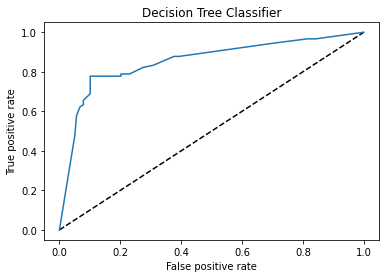

0.8383270911360798


In [80]:
y_pred_prob=dtr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtr.predict(x_test))
print(auc_score)

Random forest Classifier

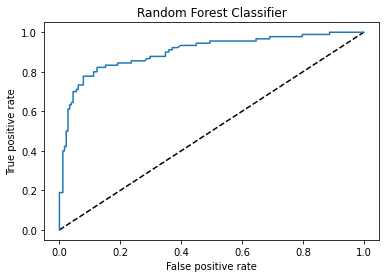

0.8383270911360798


In [79]:
y_pred_prob=rtf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtr.predict(x_test))
print(auc_score)

Through roc_auc curve decision tree and random forest models provide same accuracy score of 83%

In [82]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion='entropy',max_depth=9,max_features='auto',min_samples_leaf=3,splitter='best'),GaussianNB(),SVC(kernel='rbf',C=1),KNeighborsClassifier(),RandomForestClassifier(criterion='entropy',max_depth=11,max_features='sqrt',min_samples_leaf=5,n_estimators=200),AdaBoostClassifier(),GradientBoostingClassifier(criterion='mae',learning_rate=0.1,max_features='sqrt',n_estimators=200,random_state=0)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('/n')

Accuracy score of LogisticRegression() is:
0.8246268656716418
[[151  27]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.72      0.78      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268

/n
Accuracy score of DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto',
                       min_samples_leaf=3) is:
0.8395522388059702
[[160  18]
 [ 25  65]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       178
           1       0.78      0.72      0.75        90

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268

/n
Accuracy score of GaussianNB() is:
0.8097014925373134
[[147  31]
 [ 20

# Conculsion

Each of model is providing accuracy above 80%, while best accuracy is provided by Random forest classifier model i.e 87% after hypertuning the parameters as well as through roc_auc metrics also

# Loading the model in obj file

In [83]:
joblib.dump(rtf,'rtf model.obj')

['rtf model.obj']

# Re-loading the obj file

In [84]:
rtffile=joblib.load('rtf model.obj')
rtffile.predict(x_train)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

obj file has been fitted fine and prediction from same is in required manner.